# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [1]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [2]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
#data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

,W0,v0,y
0,-1.776272,False,-5.421983
1,-0.495653,True,3.937590
2,-0.091591,True,4.835915
3,2.063884,True,10.680488
4,-0.428395,False,-1.623755
...,...,...,...
995,0.260290,False,0.524404
996,-0.254933,False,-0.678685
997,-1.056497,False,-3.715107
998,0.276582,True,6.293696


<AxesSubplot:xlabel='v0'>

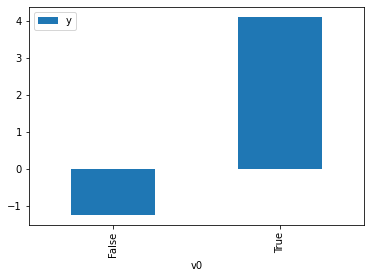

In [3]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
                     variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
                     outcome=outcome,
                     common_causes=[common_cause],
                     proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

<AxesSubplot:xlabel='v0'>

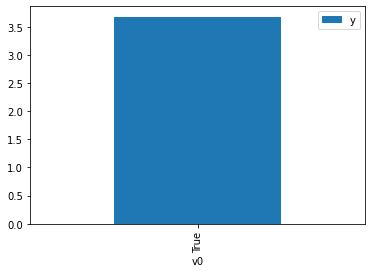

In [4]:
df.causal.do(x={treatment: 1}, 
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome,
              method='weighting', 
              common_causes=[common_cause],
              proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

In [5]:
cdf_1 = df.causal.do(x={treatment: 1}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


In [6]:
cdf_0

,W0,v0,y,propensity_score,weight
0,0.439156,False,1.013426,0.423789,2.359665
1,-0.948297,False,0.051592,0.662577,1.509257
2,-2.359919,False,-7.004448,0.842101,1.187506
3,-0.136504,False,-0.561568,0.525033,1.904643
4,0.348788,False,2.240407,0.439479,2.275420
...,...,...,...,...,...
995,-1.388408,False,-4.016485,0.728359,1.372950
996,-0.820605,False,-2.272730,0.642084,1.557429
997,-0.053536,False,-0.853663,0.510371,1.959359
998,-0.997673,False,-5.513551,0.670346,1.491767


In [7]:
cdf_1

,W0,v0,y,propensity_score,weight
0,0.157592,True,6.934225,0.526961,1.897675
1,1.022015,True,6.979554,0.672560,1.486857
2,0.812150,True,7.655955,0.639050,1.564823
3,-0.910308,True,3.814600,0.343460,2.911546
4,0.050949,True,4.295258,0.508116,1.968056
...,...,...,...,...,...
995,-0.008940,True,4.683023,0.497519,2.009974
996,0.715947,True,7.447879,0.623199,1.604623
997,-0.534131,True,3.110859,0.405728,2.464706
998,-0.629695,True,3.861078,0.389528,2.567207


## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [8]:
(cdf_1['y'] - cdf_0['y']).mean()

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

In [9]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

Comparing to the estimate from OLS.

In [10]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          1.007e+04
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                        0.00
Time:                        10:11:14   Log-Likelihood:                         -1434.5
No. Observations:                1000   AIC:                                      2873.
Df Residuals:                     998   BIC:                                      2883.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8166      0.029     97.300      0.000       2.760       2.873
x2             5.0080      0.049    103.208      0.000       4.913       5.103
==============================================================================
Omnibus:                        1.583   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.525
Skew:                           0.019   Prob(JB):                        0.466
Kurtosis:                       2.813   Cond. No.                         1.68
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""